# Question 1 K-Mean , K-Medoid and K-Median

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Data.xlsx", header=None, names=["A1", "A2", "A3", "A4", "K-means","K-medoids","K-median"])
data.head()
X = data[['A1', 'A2', 'A3', 'A4']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
def initialize(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

In [5]:
def assign_clusters_kmeans(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [6]:
def update_centroids_kmeans(X, clusters, K):
    return np.array([X[clusters == k].mean(axis=0) for k in range(K)])

In [7]:
def k_means_clustering(X, K):
    centroids = initialize(X, K)
    while(1):
        clusters = assign_clusters_kmeans(X, centroids)
        new_centroids = update_centroids_kmeans(X, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids


In [8]:
def assign_clusters_kmedoids(X, medoids):
    distances = np.array([[np.linalg.norm(x - medoid) for medoid in medoids] for x in X])
    return np.argmin(distances, axis=1)


In [9]:
def update_medoids(X, clusters, K):
    new_medoids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        medoid = cluster_points[np.argmin(np.sum(np.linalg.norm(cluster_points - cluster_points[:, None], axis=2), axis=1))]
        new_medoids.append(medoid)
    return np.array(new_medoids)


In [10]:
def k_medoids_clustering(X, K, iter):
    medoids = initialize(X, K)
    for i in range(iter):
        clusters = assign_clusters_kmedoids(X, medoids)
        new_medoids = update_medoids(X, clusters, K)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return clusters, medoids


In [11]:
def assign_clusters_kmedian(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, ord=1, axis=2)
    return np.argmin(distances, axis=1)


In [12]:
def update_centroids_kmedian(X, clusters, K):
    return np.array([np.median(X[clusters == k], axis=0) for k in range(K)])


In [13]:
def k_median_clustering(X, K, iter=100):
    centroids = initialize(X, K)
    for i in range(iter):
        clusters = assign_clusters_kmedian(X, centroids)
        new_centroids = update_centroids_kmedian(X, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids


In [14]:
def plot_clusters(X, clusters, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100)
    plt.title(title)
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.show()


ENTER NUMBER OF CLUSTERS (K):  3


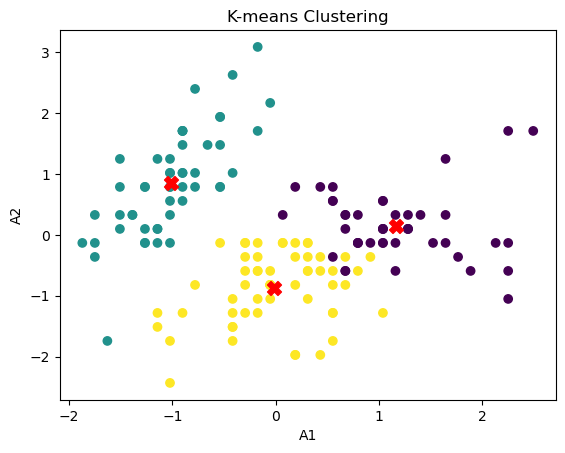

In [15]:
K = int(input("ENTER NUMBER OF CLUSTERS (K): "))
iter = 10000
clusters_kmeans, centroids_kmeans = k_means_clustering(X, K)
plot_clusters(X, clusters_kmeans, centroids_kmeans, 'K-means Clustering')


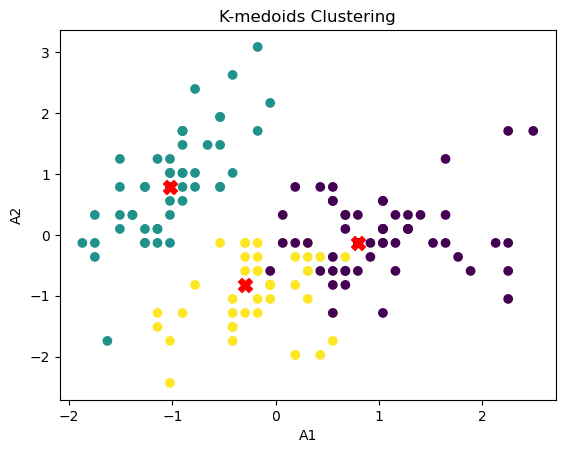

In [16]:
clusters_kmedoids, medoids_kmedoids = k_medoids_clustering(X, K,iter)
plot_clusters(X, clusters_kmedoids, medoids_kmedoids, 'K-medoids Clustering')


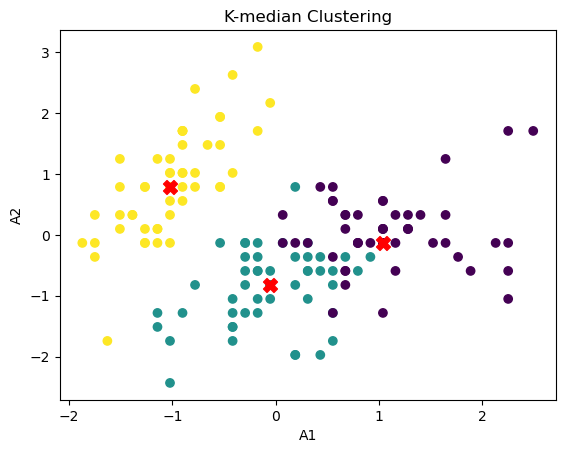

In [17]:
clusters_kmedian, centroids_kmedian = k_median_clustering(X, K,iter)
plot_clusters(X, clusters_kmedian, centroids_kmedian, 'K-median Clustering')


In [18]:

data['K-means'] = clusters_kmeans
data['K-medoids'] = clusters_kmedoids
data['K-median'] = clusters_kmedian
data.head()

,A1,A2,A3,A4,K-means,K-medoids,K-median
0,5.1,3.5,1.4,0.2,1,1,2
1,4.9,3.0,1.4,0.2,1,1,2
2,4.7,3.2,1.3,0.2,1,1,2
3,4.6,3.1,1.5,0.2,1,1,2
4,5.0,3.6,1.4,0.2,1,1,2


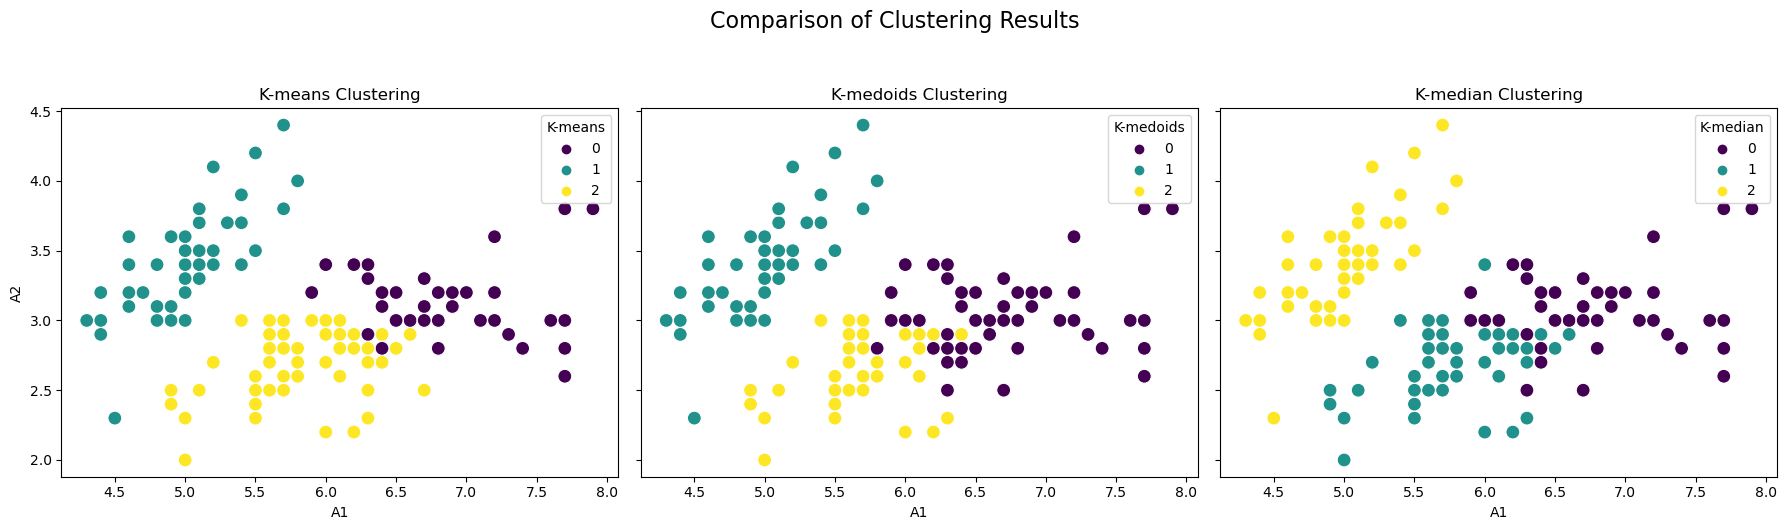

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plot_titles = ['K-means Clustering', 'K-medoids Clustering', 'K-median Clustering']
clustering_columns = ['K-means', 'K-medoids', 'K-median']

for i, col in enumerate(clustering_columns):
    sns.scatterplot(x='A1', y='A2', hue=col, data=data, palette='viridis', ax=axes[i], s=100)
    axes[i].set_title(plot_titles[i])
    axes[i].set_xlabel('A1')
    axes[i].set_ylabel('A2')
    axes[i].legend(title=col, loc='upper right')

plt.suptitle("Comparison of Clustering Results", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

# Question 02 - Hierarchical Clustering

In [20]:
# Load the dataset from Excel
data = pd.read_excel('Data.xlsx', header=None)  
data.columns = ['A1', 'A2', 'A3', 'A4']  

# Extract features
X = data[['A1', 'A2', 'A3', 'A4']].to_numpy()

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to create the initial distance matrix
def create_distance_matrix(X):
    n = len(X)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist_matrix[i, j] = dist_matrix[j, i] = euclidean_distance(X[i], X[j])
    return dist_matrix

# Function to perform hierarchical clustering
def hierarchical_clustering(X, method='single'):
    n = len(X)
    clusters = {i: [i] for i in range(n)}  # Initialize each data point as its own cluster
    distances = create_distance_matrix(X)
    linkage_matrix = []

    while len(clusters) > 1:
        min_dist = np.inf
        c1, c2 = None, None
        cluster_keys = list(clusters.keys())
        
        # Find the two closest clusters to merge
        for i, k1 in enumerate(cluster_keys):
            for j in range(i + 1, len(cluster_keys)):
                k2 = cluster_keys[j]
                if method == 'single':  # Single linkage
                    dist = min(distances[p1][p2] for p1 in clusters[k1] for p2 in clusters[k2])
                elif method == 'complete':  # Complete linkage
                    dist = max(distances[p1][p2] for p1 in clusters[k1] for p2 in clusters[k2])
                elif method == 'average':  # Average linkage
                    dist = np.mean([distances[p1][p2] for p1 in clusters[k1] for p2 in clusters[k2]])
                
                if dist < min_dist:
                    min_dist, c1, c2 = dist, k1, k2

        # Merge clusters c1 and c2
        new_cluster = clusters[c1] + clusters[c2]
        del clusters[c1], clusters[c2]
        new_key = max(clusters.keys(), default=-1) + 1
        clusters[new_key] = new_cluster

        # Append linkage information
        linkage_matrix.append([c1, c2, min_dist, len(new_cluster)])

    return np.array(linkage_matrix)


In [28]:
# Function to plot the dendrogram
def plot_dendrogram(linkage_matrix, num_points):
    plt.figure(figsize=(12, 8))
    plt.title('Dendrogram')
    plt.xlabel('Index (1 to 150)')
    plt.ylabel('Distance')

    # Mapping of cluster indices to positions on x-axis (1 to 150)
    cluster_position = {i: i + 1 for i in range(num_points)} 
    current_position = num_points

    # Draw dendrogram lines
    for c1, c2, dist, size in linkage_matrix:
        pos1, pos2 = cluster_position[int(c1)], cluster_position[int(c2)]
        new_pos = (pos1 + pos2) / 2

        plt.plot([pos1, pos1, pos2, pos2], [0, dist, dist, 0], c='purple')

        cluster_position[current_position] = new_pos
        current_position += 1

    plt.xticks(np.arange(1, num_points + 1, step=10))
    plt.xlim(1, num_points)
    plt.show()

Single Linkage Clustering:


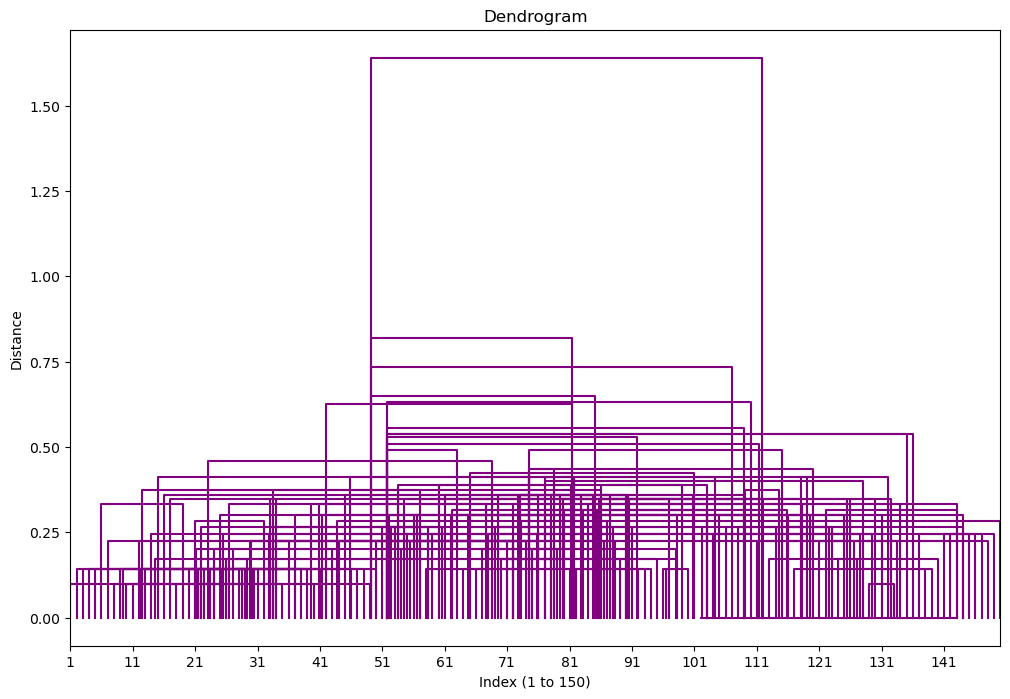

In [29]:
# Perform hierarchical clustering and plot dendrograms
linkage_single = hierarchical_clustering(X, method='single')
print("Single Linkage Clustering:")
plot_dendrogram(linkage_single, len(X))

Complete Linkage Clustering:


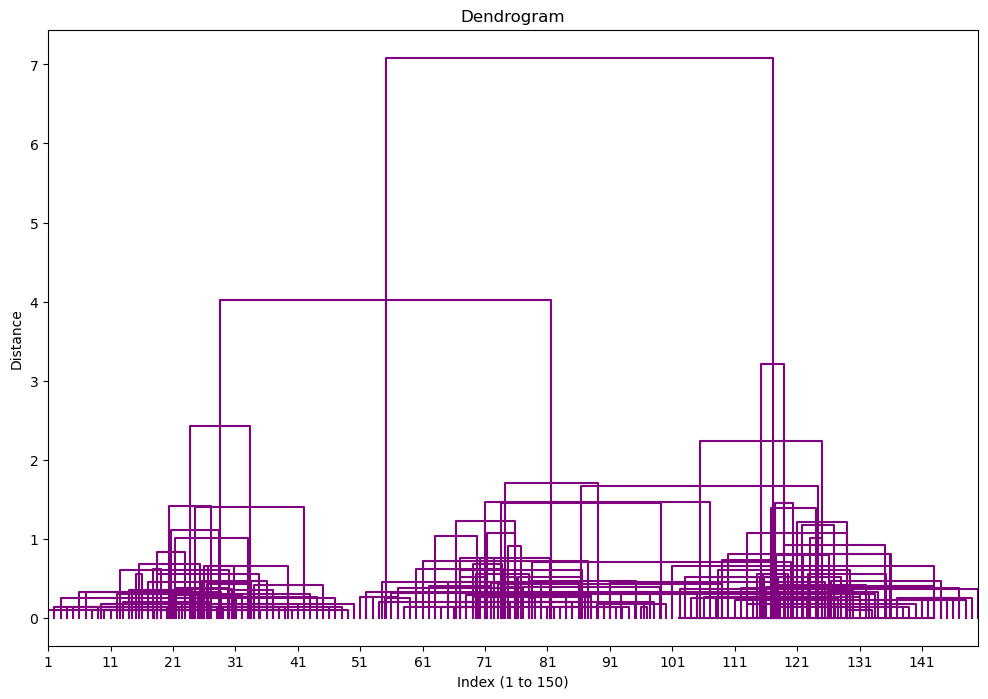

In [30]:
linkage_complete = hierarchical_clustering(X, method='complete')
print("Complete Linkage Clustering:")
plot_dendrogram(linkage_complete, len(X))


Average Linkage Clustering:


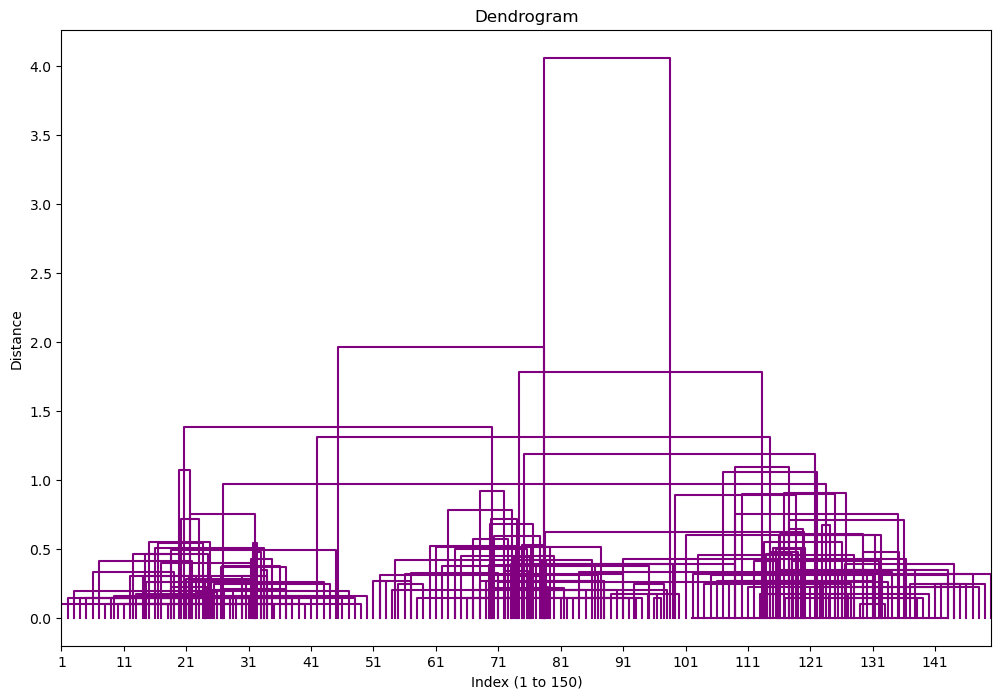

In [31]:
linkage_average = hierarchical_clustering(X, method='average')
print("Average Linkage Clustering:")
plot_dendrogram(linkage_average, len(X))

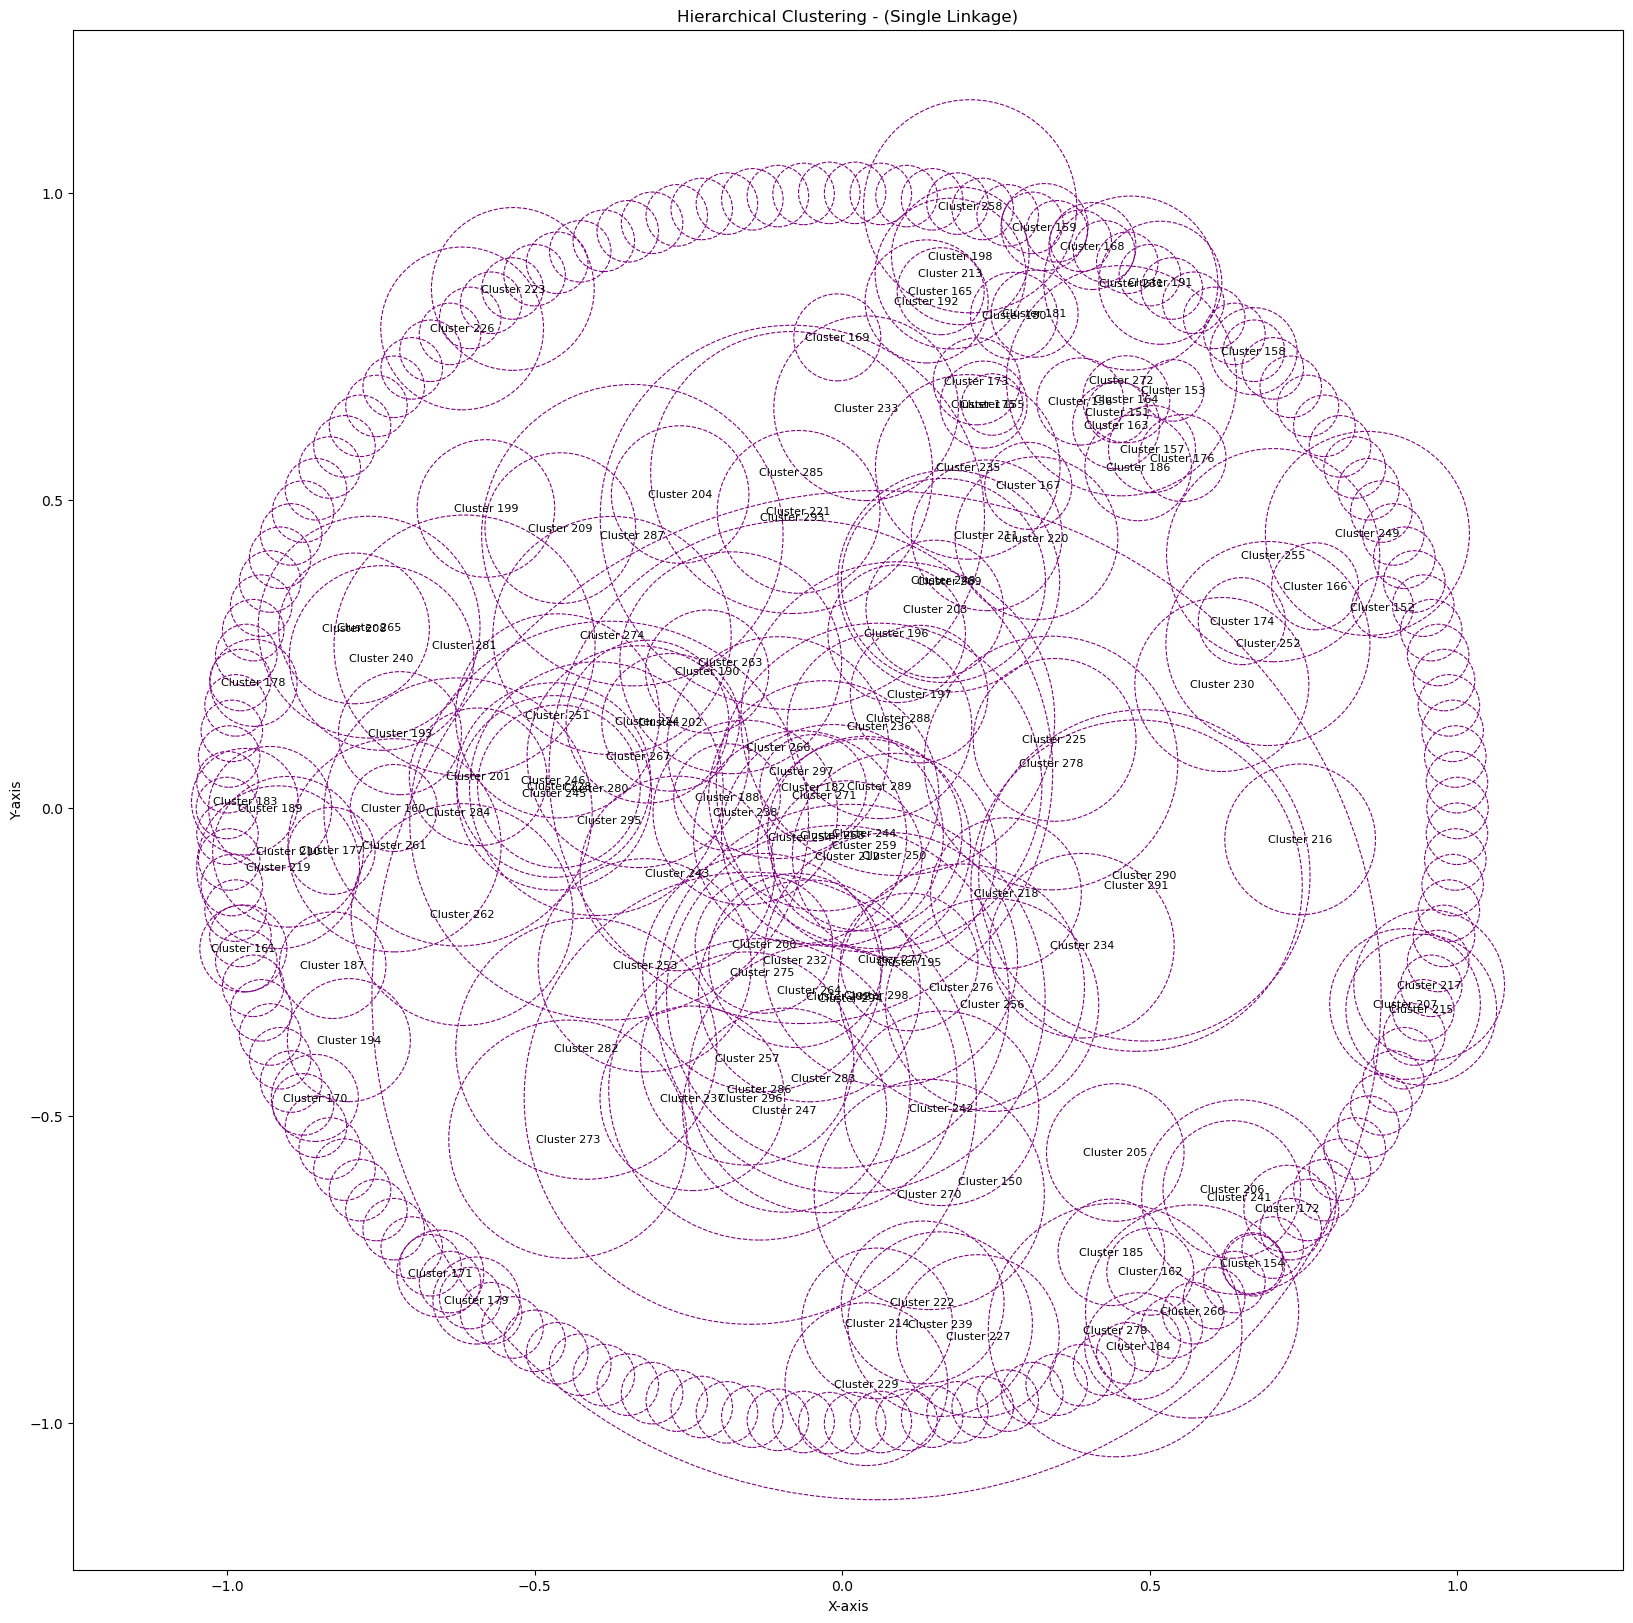

In [25]:
# Function to plot a Venn-style diagram for hierarchical clustering

def plot_cluster_merges(linkage_matrix, num_points, method_name=""):
    plt.figure(figsize=(20, 20))
    plt.title(f"Hierarchical Clustering - ({method_name} Linkage)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

    # Initial cluster positions
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    cluster_position = {i: (np.cos(angle), np.sin(angle)) for i, angle in enumerate(angles)}
    current_position = num_points  
    
    # Function to draw a circle for each cluster merge
    def draw_circle(x, y, radius, label=None):
        circle = plt.Circle((x, y), radius, color='purple', fill=False, linestyle="--", linewidth=0.8)
        plt.gca().add_patch(circle)
        if label is not None:
            plt.text(x, y, label, ha="center", va="center", fontsize=8)

    # Draw initial points as small circles
    for i in range(num_points):
        x, y = cluster_position[i]
        draw_circle(x, y, 0.05)  

    # Process each merge in linkage_matrix and draw circles representing merges
    for c1, c2, dist, size in linkage_matrix:
        pos1, pos2 = cluster_position[int(c1)], cluster_position[int(c2)]
        
        # Calculate the midpoint for the new merged cluster
        x = (pos1[0] + pos2[0]) / 2
        y = (pos1[1] + pos2[1]) / 2
        new_radius = dist / 2 

        # Draw circle for this merged cluster
        draw_circle(x, y, new_radius, label=f"Cluster {current_position}")

        # Update position of the new cluster
        cluster_position[current_position] = (x, y)
        current_position += 1  

    plt.axis("equal")
    plt.show()



# Plot the Venn-style diagram for each linkage method
plot_cluster_merges(linkage_single, num_points=len(X), method_name="Single")

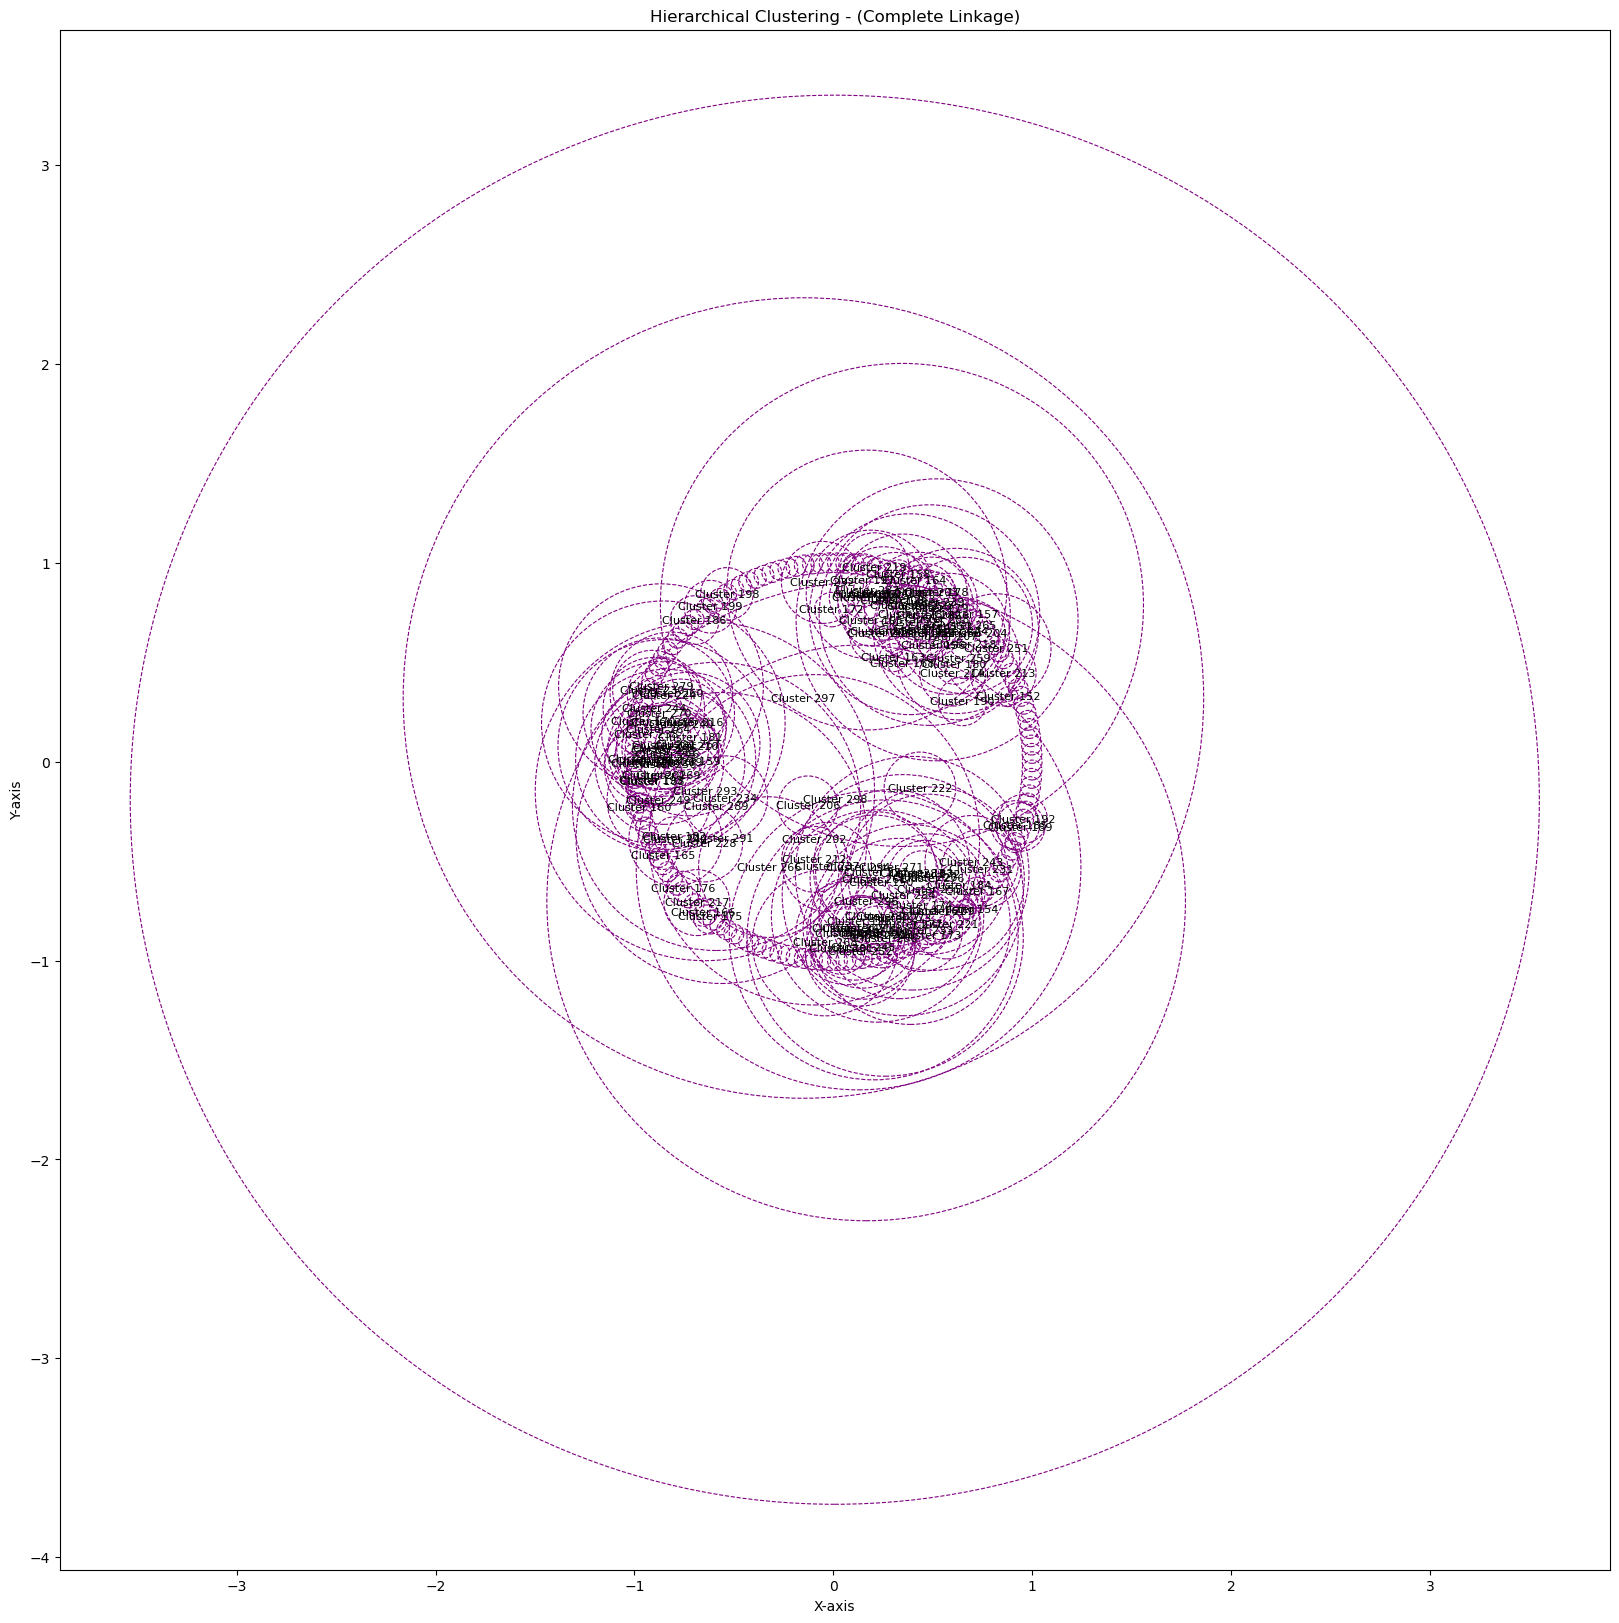

In [26]:
plot_cluster_merges(linkage_complete, num_points=len(X), method_name="Complete")

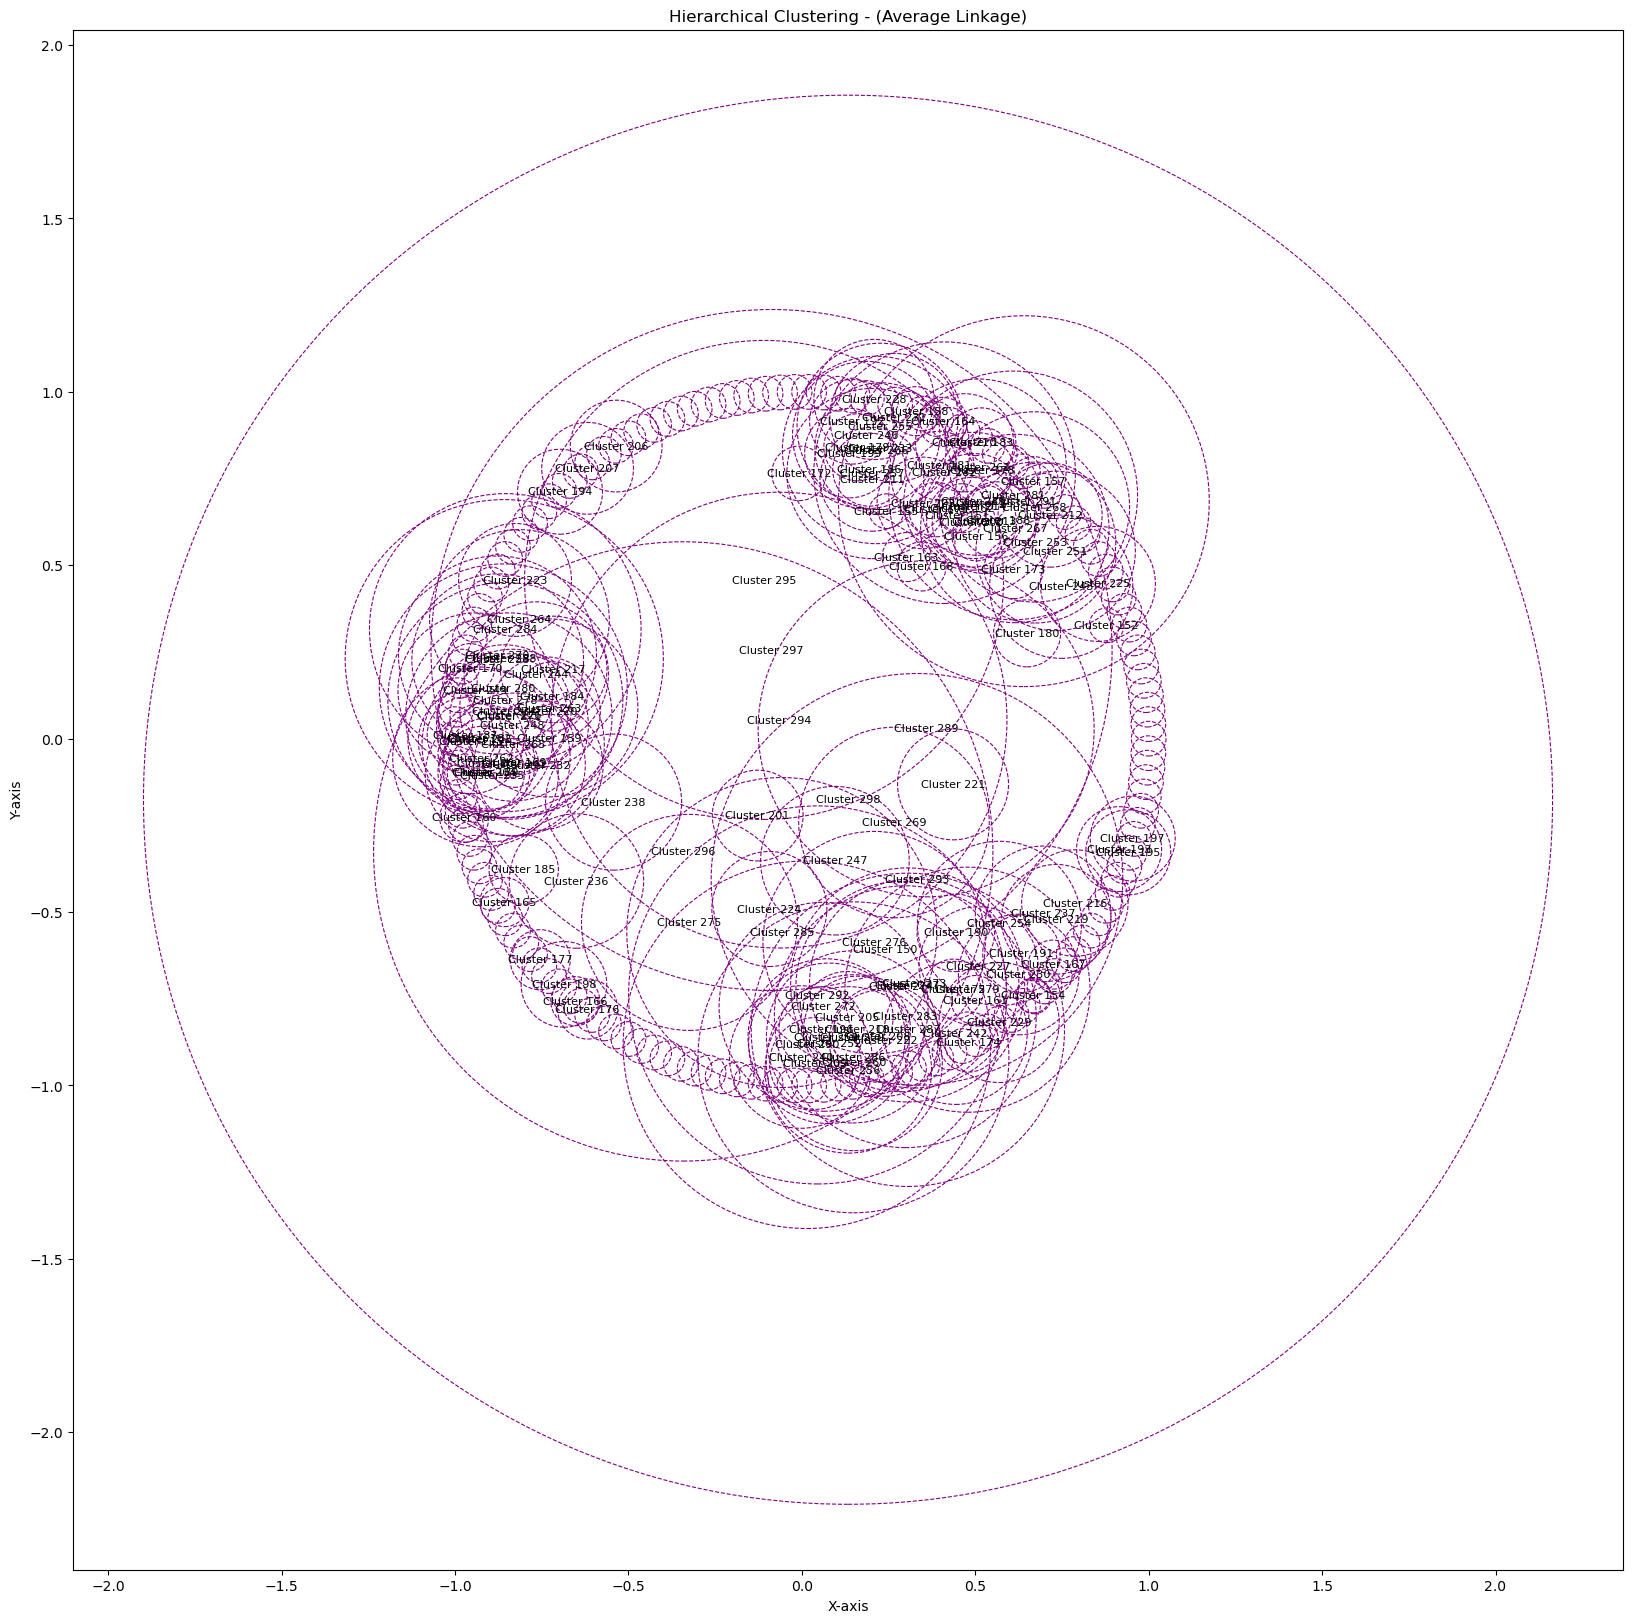

In [27]:
plot_cluster_merges(linkage_average, num_points=len(X), method_name="Average")